In [53]:
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

scenario = "0304hydrogen"

In [54]:
sns.set_theme(style="whitegrid")
#path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow", "2050example")
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow" )
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")
path_to_load = os.path.join(path_to_results, "amiris-config", "data","load.csv")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
path_to_electricity_prices = os.path.join(path_to_results, "output","raw","EnergyExchangeMulti.csv" )

path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "AMIRIS")
if not os.path.exists(path_to_plots):
    os.makedirs(path_to_plots)
#-----------------------------------------------------------------------------
elec_prices_data = pd.read_csv(path_to_electricity_prices, sep=";")  
generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
load_data = pd.read_csv(path_to_load, sep=";", header=None) 
results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
renewables_data = pd.read_excel(path_to_structure, sheet_name='renewables', index_col=0)
electrolysers_data = pd.read_excel(path_to_structure, sheet_name='electrolysers', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)
# Why is the electrolysis_hydrogen_generation given in the load generation? I think that value is not needed. 

In [55]:
print("Conventionals " + str(conventionals_data["InstalledPowerInMW"].sum()/1000))
print("Renewables " + str(renewables_data["InstalledPowerInMW"].sum()/1000))
print("electrolysers " + str(electrolysers_data["PeakConsumptionInMW"].sum()/1000))
print("biogas " + str(biogas_data["InstalledPowerInMW"].sum()/1000))


Conventionals 12.376
Renewables 181.89
electrolysers 41.071
biogas 0.0


In [56]:
print("s")

s


In [57]:
windoff = renewables_data[renewables_data["Set"] =="WindOff"]
renewables_join = pd.merge(windoff, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
renewables_join

,identifier,InstalledPowerInMW,OpexVarInEURperMWH,Set,SupportInstrument,FIT,Premium,Lcoe,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,20500100030,7000,3.0,WindOff,NONE,-,-,-,2.995251e+07,7.019750e+08,NaN,9.984169e+06,6.720225e+08
1,20470100031,7000,3.0,WindOff,NONE,-,-,-,2.995251e+07,7.019750e+08,NaN,9.984169e+06,6.720225e+08
2,20440100032,7000,3.0,WindOff,NONE,-,-,-,2.995251e+07,7.019750e+08,NaN,9.984169e+06,6.720225e+08
3,20410100033,7000,3.0,WindOff,NONE,-,-,-,2.995251e+07,7.019750e+08,NaN,9.984169e+06,6.720225e+08
4,20400100034,7000,3.0,WindOff,NONE,-,-,-,2.995251e+07,7.019750e+08,NaN,9.984169e+06,6.720225e+08
5,20380100035,7000,3.0,WindOff,NONE,-,-,-,2.995251e+07,7.019750e+08,NaN,9.984169e+06,6.720225e+08
6,20360100036,7000,3.0,WindOff,NONE,-,-,-,2.995251e+07,7.019750e+08,NaN,9.984169e+06,6.720225e+08
7,20340100037,7000,3.0,WindOff,NONE,-,-,-,2.995251e+07,7.019750e+08,NaN,9.984169e+06,6.720225e+08
8,20320100038,7000,3.0,WindOff,NONE,-,-,-,2.995251e+07,7.019750e+08,NaN,9.984169e+06,6.720225e+08
9,20300100039,7000,3.0,WindOff,NONE,-,-,-,2.995251e+07,7.019750e+08,NaN,9.984169e+06,6.720225e+08


In [58]:
conventionals_join = pd.merge(conventionals_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
storages_results = pd.merge(storages_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
electrolysers_results = pd.merge(electrolysers_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
electrolysers_results.head()

,identifier,ElectrolyserType,PeakConsumptionInMW,ConversionFactor,HydrogenProductionTargetInMWH,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,99999999999,ELECTROLYSIS,41071,0.74,12901502.5,1.177172e+09,4.668794e+09,7.886476e+07,NaN,3.491622e+09


In [59]:
storages = None
if storages != None:
    path_to_storages_raw = os.path.join(path_to_results, "output","raw","StorageTrader.csv")
    storages_raw = pd.read_csv(path_to_storages_raw, sep=";") 
    print("storages " + str(storages_data["InstalledPowerInMW"].sum()/1000))
    storage_levels_data.head()
    storages_results["InstalledPowerInMW"].sum()
    #storage_levels_data["value"][1:].plot.scatter() # 
    storage_levels_data.reset_index().plot.scatter(x = 'index', y = 'value')
    production = storages_results['PRODUCTION_IN_MWH'].sum()
    discharging = generation_data["storages_discharging"].sum()
    charging = generation_data["storages_charging"].sum()
    print("production/discharging "+ str(production/discharging) )
    discharging/charging

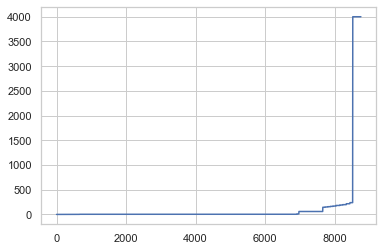

In [60]:
sorted_elec_prices = elec_prices_data["ElectricityPriceInEURperMWH"].copy()
#sorted_elec_prices.plot()
axs1 = sorted_elec_prices.sort_values(ignore_index=True).plot()
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'elec_prices.png', bbox_inches='tight', dpi=300)

In [61]:
elec_prices_data.head()

,AgentId,TimeStep,TotalAwardedPowerInMW,ElectricityPriceInEURperMWH,DispatchSystemCostInEUR
0,1,946080003,16911.589856,3.0,39161.849569
1,1,946083603,16678.690025,3.0,37651.350074
2,1,946087203,16280.179757,3.0,35465.819272
3,1,946090803,15987.800126,3.0,33479.880377
4,1,946094403,16068.635647,3.0,32890.786941


In [62]:
electrolysers_results

,identifier,ElectrolyserType,PeakConsumptionInMW,ConversionFactor,HydrogenProductionTargetInMWH,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,99999999999,ELECTROLYSIS,41071,0.74,12901502.5,1.177172e+09,4.668794e+09,7.886476e+07,NaN,3.491622e+09


In [63]:
load_generation = pd.concat([generation_data, 
                      load_data],   axis=1 )
load_generation.drop(0, axis=1, inplace=True) # dropping timeseries
load_generation.rename(columns={1: "load" }, inplace=True)
# load_generation.sort_values(by=1, inplace=True) # sorting by increasing load
# load_generation.reset_index(inplace=True )
#load_generation.drop("index", axis=1, inplace=True)
load_generation.drop("electrolysis_hydrogen_generation", axis=1, inplace=True)
load_generation.head()

,res,conventionals,storages_discharging,storages_charging,storages_aggregated_level,load_shedding,electrolysis_power_consumption,load
0,16911.589856,0.0,0.0,0.0,0.0,0.0,320.0,16591.589856
1,16678.690025,0.0,0.0,0.0,0.0,0.0,320.0,16358.690025
2,16280.179757,0.0,0.0,0.0,0.0,0.0,320.0,15960.179757
3,15987.800126,0.0,0.0,0.0,0.0,0.0,320.0,15667.800126
4,16068.635647,0.0,0.0,0.0,0.0,0.0,320.0,15748.635647


In [64]:
load_generation["storages_charging"] = load_generation["storages_charging"]*-1
load_generation["electrolysis_power_consumption"] = load_generation["electrolysis_power_consumption"]*-1
load_generation.drop("storages_aggregated_level", axis=1, inplace=True)

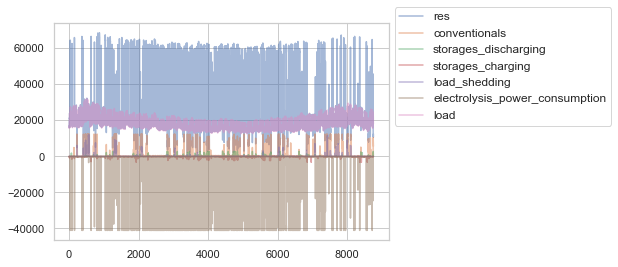

In [65]:
load_generation.plot(alpha=0.5)
axs1= plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'testing.png', bbox_inches='tight', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


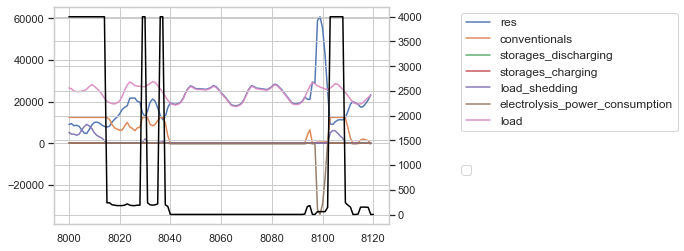

In [66]:
ElectricityPriceInEURperMWH = elec_prices_data["ElectricityPriceInEURperMWH" ]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
load_generation.iloc[8000:8120,0:7].plot( ax=ax1, alpha=0.95)
#ax1.plot(load_generation.iloc[8740:8760,0:5] , alpha=0.95)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[8000:8120] , color = "black")
ax2.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'timeseries.png', bbox_inches='tight', dpi=300)

In [67]:
# plt.stackplot( load_generation.index, load_generation.res, load_generation.conventionals, load_generation.load_shedding, load_generation.storages_discharging,
#               load_generation.storages_discharging,  labels=['RES', 'conventional', "load shedding", "dish", "charg"]  )


In [68]:
load_generation

,res,conventionals,storages_discharging,storages_charging,load_shedding,electrolysis_power_consumption,load
0,16911.589856,0.000000,0.000000,-0.0,0.0,-320.0,16591.589856
1,16678.690025,0.000000,0.000000,-0.0,0.0,-320.0,16358.690025
2,16280.179757,0.000000,0.000000,-0.0,0.0,-320.0,15960.179757
3,15987.800126,0.000000,0.000000,-0.0,0.0,-320.0,15667.800126
4,16068.635647,0.000000,0.000000,-0.0,0.0,-320.0,15748.635647
...,...,...,...,...,...,...,...
8755,11633.840000,8830.623846,1696.935634,-0.0,0.0,-0.0,22161.399480
8756,10955.840000,8152.100989,1696.935634,-0.0,0.0,-0.0,20804.876623
8757,10721.840000,8844.239689,338.008739,-0.0,0.0,-0.0,19904.088428
8758,11481.840000,7554.498881,81.942362,-0.0,0.0,-0.0,19118.281243


In [69]:
# this only work when there is one battery!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# storages_bids_discharge = storages_raw["OfferedDischargePriceInEURperMWH"].dropna()
# storages_bids_discharge.reset_index(drop=True, inplace = True)
# storages_bids_charge = storages_raw["OfferedChargePriceInEURperMWH"].dropna()
# storages_bids_charge.reset_index(drop=True, inplace = True)
# storages_bids_charge.sort_values(ignore_index=True).plot()

# AwardedDischargePowerInMWH = storages_raw["AwardedDischargePowerInMWH"].dropna()
# AwardedDischargePowerInMWH.reset_index(drop=True, inplace = True)
# plt.scatter(x = ElectricityPriceInEURperMWH , y= AwardedDischargePowerInMWH )
# plt.legend()
# plt.xlabel("ElectricityPriceInEURperMWH")
# plt.ylabel("AwardedDischargePowerInMWH")
# plt.savefig(path_to_plots + '/' + 'DischargePowervsprices.png', bbox_inches='tight', dpi=300)


In [70]:
# this only work when there is one battery!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# x = storages_bids_discharge.values.reshape(-1,1)
# y = storages_bids_charge.values.reshape(-1,1)
# regr = LinearRegression()
# regr.fit(x, y)
# fig = plt.scatter(x, y,  color='black')
# plt.plot(x, regr.predict(x), color='blue', linewidth=3)
# plt.xticks(())
# plt.yticks(())
# plt.xlabel("ElectricityPriceInEURperMWH")
# plt.ylabel("OfferedDischargePriceInEURperMWH")
# plt.legend()
# plt.show()
# print("Coefficients: \n", regr.coef_)


In [71]:
# this only work when there is one battery!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# storages_bids_discharge.loc[8500:8760].plot( ax=ax1, color = "blue")
# ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
# ax2.plot(ElectricityPriceInEURperMWH.loc[8500:8760] , color = "black")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


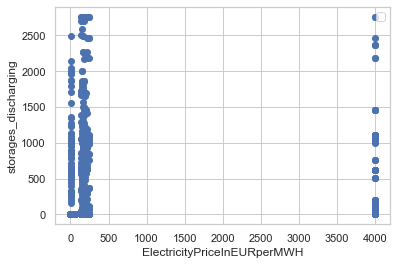

In [72]:
load_generation["storages_discharging"]
plt.scatter(x = ElectricityPriceInEURperMWH , y= load_generation["storages_discharging"] )
plt.legend()
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("storages_discharging")
plt.savefig(path_to_plots + '/' + 'BatteriesProductionvsPricesTimeseries.png', bbox_inches='tight', dpi=300)

In [112]:
sum_storages = storages.sum().divide(1000).to_string()
print(sum_storages)

storages_charging      -550.76802
storages_discharging    466.16081


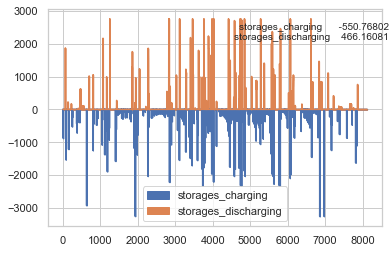

In [114]:
storages = load_generation[["storages_charging", "storages_discharging"]].copy()
ax1 = storages.iloc[0:8120,:].plot.area()
ax1.annotate(sum_storages,
               xy=(0.9, 0.8), xycoords='figure fraction',
               horizontalalignment='right', verticalalignment='top',
               fontsize='small')
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'storages_timeseries.png', bbox_inches='tight', dpi=300)

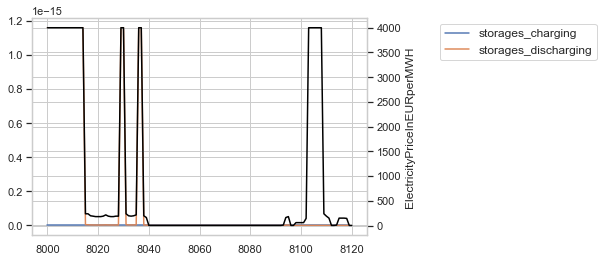

In [96]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
storages.iloc[8000:8120,:].plot( ax=ax1, alpha=0.95)
#load_generation.iloc[8000:8120,4].plot( ax=ax1, alpha=0.95)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[8000:8120] , color = "black")
ax2.set_ylabel('ElectricityPriceInEURperMWH')
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'storages_timeseries_short.png', bbox_inches='tight', dpi=300)

In [75]:
electrolysisPowerConsumptioninMWh  = load_generation["electrolysis_power_consumption"]

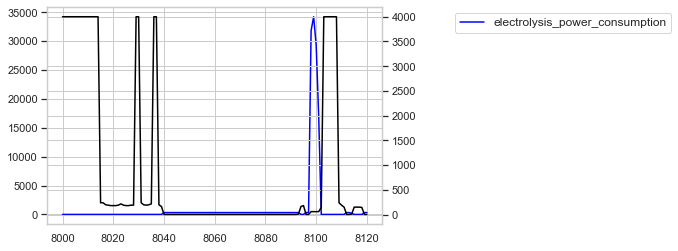

In [76]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
electrolysisPowerConsumptioninMWh = electrolysisPowerConsumptioninMWh*-1
electrolysisPowerConsumptioninMWh.loc[8000:8120].plot( ax=ax1, color = "blue")
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[8000:8120] , color = "black")
plt.savefig(path_to_plots + '/' + 'H2vsPricesTimeseries.png', bbox_inches='tight', dpi=300)

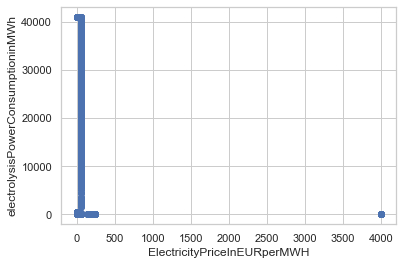

In [77]:
electricityPrice= ElectricityPriceInEURperMWH.values.reshape(-1,1)
electrolysisPower = electrolysisPowerConsumptioninMWh.values.reshape(-1,1)
fig = plt.scatter(electricityPrice, electrolysisPower)
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("electrolysisPowerConsumptioninMWh")
plt.savefig(path_to_plots + '/' + 'H2vsPrices.png', bbox_inches='tight', dpi=300)

In [78]:
h2prices = pd.DataFrame(list(zip(ElectricityPriceInEURperMWH, electrolysisPowerConsumptioninMWh)),
              columns =['electricityPrice', 'electrolysisPower'])
h2prices.head()

,electricityPrice,electrolysisPower
0,3.0,320.0
1,3.0,320.0
2,3.0,320.0
3,3.0,320.0
4,3.0,320.0


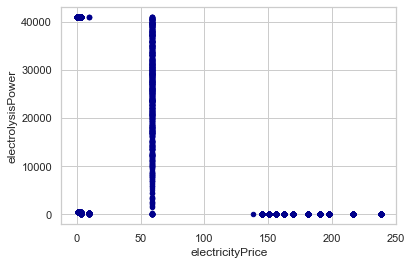

In [79]:
h2prices_filtered = h2prices[h2prices["electricityPrice"] < 4000]
ax1 = h2prices_filtered.plot.scatter(x='electricityPrice',
                       y='electrolysisPower',
                       c='DarkBlue')
plt.savefig(path_to_plots + '/' + 'H2vsPricesZoom.png', bbox_inches='tight', dpi=300)

In [80]:
# LOLE
len(h2prices[h2prices["electricityPrice"] == 4000].index)

238

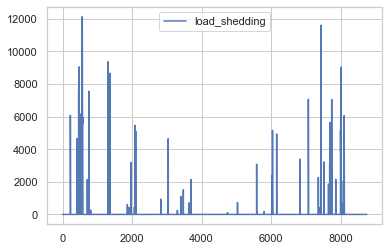

In [116]:
ax1 = load_generation[["load_shedding"]].plot( alpha=0.95)
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'load_shedding.png', bbox_inches='tight', dpi=300)

In [82]:
conventionals_join
#conventionals_join.loc[conventionals_join['FuelType'] =="HYDROGEN"]

,identifier,FuelType,OpexVarInEURperMWH,Efficiency,BlockSizeInMW,InstalledPowerInMW,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,20501900040,NUCLEAR,4.0,0.285000,484,484,8.740474e+06,5.569649e+08,NaN,8.802244e+05,5.482245e+08
1,20460800041,NATURAL_GAS,4.2,0.586198,1000,1000,1.543310e+08,1.104878e+09,NaN,1.066167e+06,9.505469e+08
2,20420800042,NATURAL_GAS,4.2,0.563325,1000,1000,1.493005e+08,1.093958e+09,NaN,9.922929e+05,9.446573e+08
3,20380800043,NATURAL_GAS,4.2,0.541344,1000,1000,1.436001e+08,1.082586e+09,NaN,9.181658e+05,9.389858e+08
4,20340800044,NATURAL_GAS,4.2,0.520221,1000,1000,1.375542e+08,1.071102e+09,NaN,8.460770e+05,9.335475e+08
5,20402200047,NATURAL_GAS,4.5,0.389273,1300,1300,1.022459e+08,1.275299e+09,NaN,4.730193e+05,1.173053e+09
6,20302200046,NATURAL_GAS,4.5,0.352404,1300,1300,8.554619e+07,1.249416e+09,NaN,3.589857e+05,1.163870e+09
7,20370900050,NATURAL_GAS,4.2,0.465691,1309,1309,1.579938e+08,1.361781e+09,NaN,8.722963e+05,1.203787e+09
8,20320900049,NATURAL_GAS,4.2,0.443089,1320,1320,1.430493e+08,1.349697e+09,NaN,7.523010e+05,1.206648e+09
9,20280900048,NATURAL_GAS,4.2,0.425800,1320,1320,1.231477e+08,1.324553e+09,NaN,6.229043e+05,1.201406e+09


In [83]:
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
conventional_production_from_generation = load_generation["conventionals"].sum()
a = conventional_production - conventional_production_from_generation

In [84]:
storages_data.head()

,identifier,StorageType,EnergyToPowerRatio,ChargingEfficiency,DischargingEfficiency,InitialEnergyLevelInMWH,InstalledPowerInMW
0,20502600052,STORAGE,5,0.92,0.92,0,3000


In [85]:
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
charging_from_generation = load_generation["storages_discharging"].sum()

In [86]:
#power consumed in MW
totalH2 = electrolysisPowerConsumptioninMWh.sum()
totalH2*0.74

58359922.99617268

In [87]:
# Input = TWh monthly12901502.5

Input = 12901502.5*12/0.74
print(Input/totalH2)

2.6528141582735323


In [88]:
load_generation['group'] = (load_generation.index // 730)

In [89]:
grouped = load_generation.groupby(['group']).sum()

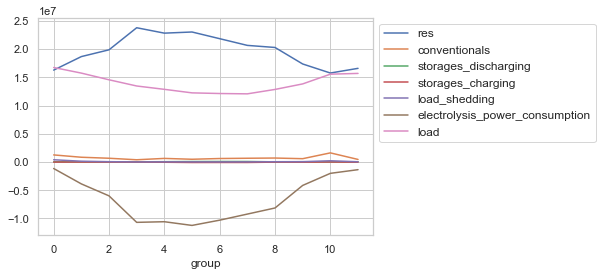

In [90]:
fig = grouped.plot()
fig.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1))